<center>

#                                        Amazon Sale Report — Data Processing & Visual Exploration 

</center>

# 1. Aim and Objectives

## Aim
To clean and prepare the *Amazon Sale Report* dataset using **Pandas**, producing an analysis-ready dataset and exploring **sales** and **fulfilment** patterns using multiple analytical and visual techniques.

## Objectives
1. **Validate dataset structure and quality** by checking missing values, duplicates, data types, and logical consistency.  
2. **Apply a transparent data processing workflow** including cleaning, standardisation, feature engineering, and validation checks.  
3. **Perform visual data exploration (3+ techniques)** using multiple charts to identify trends, relationships, and actionable insights in sales and fulfilment performance.


# 2. Tools and Techniques

## Tools
- **Pandas (mandatory):** loading, cleaning, transformation, aggregation  
- **NumPy:** numeric handling and conditional logic  
- **Matplotlib/Seaborn:** visual exploration and presentation  

## Techniques
- **Missing value profiling** + justified handling  
- **Duplicate detection** and key-based checks  
- **Type conversion** (dates, numeric amounts)  
- **Standardising categorical values**  
- **Feature engineering** (time features, derived metrics)  
- **Grouping/aggregation** and comparisons  
- **Visual exploration:** bar charts, line trends, distributions/boxplots, heatmaps  


# 3. Data Collection

## Dataset
**Amazon Sale Report (CSV)**  
This dataset contains order-level e-commerce transactions, including order dates, quantities, monetary amounts, fulfilment method, product category, order status, and shipping geography.

## Justification
- **Real-world transactional structure** suitable for applied data cleaning and preparation tasks.  
- **Mixture of numeric, categorical, and date fields** enables a complete end-to-end data processing workflow.  
- **Sufficient data volume** to support meaningful aggregation, comparison, and visual insights.  
- **Reproducibility:** the dataset is publicly available and can be executed by the marker.

## Reproducibility and File Handling
- The notebook loads the dataset using a **relative file path**: `Amazon Sale Report.csv`.  
- **No hard-coded local machine paths** are used, ensuring portability and reproducibility.


## GITHUB REPOSITORY

- **GitHub URL :** https://github.com/Saneeshna/MN5813---Amazon-Sale-Report-Data-Processing-Visual-Exploration

- **QR CODE :**

  <div style="text-align:center;">
  <img src="QR.png" width="180" alt="GitHub QR Code">
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


In [2]:
# Load data (relative path so markers can run it)
path = "Amazon Sale Report.csv"
df_raw = pd.read_csv(path)

print("Raw shape:", df_raw.shape)
df_raw.head()


Raw shape: (128976, 21)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


### 4. Data Processing 

This section documents the data processing pipeline.
The goal is to produce a clean, consistent, analysis-ready dataset, with decisions explained and validated.

In [3]:
# Make a working copy
df = df_raw.copy()

# Standardise column names (human-friendly + prevents key errors)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

df.head()


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
# Quick structure check
display(df.shape)
display(df.dtypes)
df.sample(5, random_state=42)


(128976, 21)

index                   int64
order_id               object
date                   object
status                 object
fulfilment             object
sales_channel          object
ship_service_level     object
category               object
size                   object
courier_status         object
qty                     int64
currency               object
amount                float64
ship_city              object
ship_state             object
ship_postal_code      float64
ship_country           object
b2b                      bool
fulfilled_by           object
new                   float64
pendings              float64
dtype: object

,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings
98165,98164,405-2539019-7739511,06-23-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,INR,436.0,GURUGRAM,HARYANA,122001.0,IN,False,NaN,NaN,NaN
8776,8775,171-9423437-6005132,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,XL,Shipped,1,INR,540.0,"Carona, Aldona",GOA,403523.0,IN,False,Easy Ship,NaN,NaN
114136,114135,171-8653256-5172308,06-11-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,M,Shipped,1,INR,432.0,TUMAKURU,KARNATAKA,572105.0,IN,False,NaN,NaN,NaN
119795,119794,171-8562396-3904321,06-07-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,1399.0,BHUNTAR,HIMACHAL PRADESH,175125.0,IN,False,Easy Ship,NaN,NaN
69079,69078,404-2183469-8997958,05-15-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,5XL,Shipped,1,INR,925.0,JAIPUR,RAJASTHAN,302004.0,IN,False,Easy Ship,NaN,NaN


In [5]:
# Missing values profiling (count + %)
missing = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("missing_pct", ascending=False)

missing.head(15)


,missing_count,missing_pct
pendings,128976,100.00
new,128976,100.00
fulfilled_by,89713,69.56
currency,7800,6.05
amount,7800,6.05
ship_state,35,0.03
ship_city,35,0.03
ship_postal_code,35,0.03
ship_country,35,0.03
index,0,0.00


In [6]:
# Duplicate rows (full-row duplicates)
dup_count = df.duplicated().sum()
print("Full-row duplicates:", dup_count)

if dup_count > 0:
    df = df.drop_duplicates().copy()
    print("After dropping duplicates:", df.shape)


Full-row duplicates: 168
After dropping duplicates: (128808, 21)


## 4.1 Type Conversion and Consistency Checks

Transactional datasets often store numeric and date fields as text, which can lead to incorrect analysis if not handled properly.  
In this step, data types are standardised to ensure analytical consistency and reliability.

The following actions are performed:

- **Parse date fields safely** to ensure correct temporal ordering and enable time-based analysis.  
- **Convert quantity and amount fields to numeric types**, coercing invalid values where necessary.  
- **Remove or flag obvious invalid records**, such as negative quantities or monetary amounts, to maintain logical consistency in transactional data.


In [7]:
# Safe parsing for date column if present
date_candidates = [c for c in df.columns if "date" in c]
date_candidates


['date']

In [21]:
# Convert main date column (robust for mixed date formats)
if "date" in df.columns:
    df["date"] = pd.to_datetime(
        df["date"],
        errors="coerce"
    )

# Convert quantity and amount if present
for col in ["qty", "amount"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Basic validity: remove impossible negative qty/amount
if "qty" in df.columns:
    df.loc[df["qty"] < 0, "qty"] = np.nan
if "amount" in df.columns:
    df.loc[df["amount"] < 0, "amount"] = np.nan

df[["date","qty","amount"]].head() if set(["date","qty","amount"]).issubset(df.columns) else df.head()


,date,qty,amount
0,2022-04-30,0.0,647.62
1,2022-04-30,1.0,406.00
2,2022-04-30,1.0,329.00
3,2022-04-30,0.0,753.33
4,2022-04-30,1.0,574.00


## 4.2 Handling Missing Values (Justified)

Missing values are handled using a justified, context-aware approach to minimise data loss while preserving analytical integrity.

The following strategies are applied:

- **Amount fields:** imputed using the **median**, which is robust to outliers and skewed transaction values.  
- **Shipping geography fields:** missing values are filled with **"Unknown"** to retain records for geographic and fulfilment analysis.  
- **Low-importance operational fields:** filled with **"Unknown"** to avoid unnecessary row deletion and maintain dataset size.

All imputation decisions are **explicitly documented**, transparent, and can be revised if domain assumptions change.


In [9]:
# Identify common geo/ops columns (dataset-dependent)
geo_cols = [c for c in df.columns if c.startswith("ship_") or "ship" in c]
geo_cols[:15]


['ship_service_level',
 'ship_city',
 'ship_state',
 'ship_postal_code',
 'ship_country']

In [10]:
# Impute amount with median (if column exists)
if "amount" in df.columns:
    median_amount = df["amount"].median()
    df["amount"] = df["amount"].fillna(median_amount)

# Fill shipping-related missing values with 'Unknown'
for c in geo_cols:
    if df[c].dtype == "object":
        df[c] = df[c].fillna("Unknown")

# Fill a common fulfilment column if present
for c in ["fulfilled_by", "fulfilment", "courier_status", "status"]:
    if c in df.columns and df[c].dtype == "object":
        df[c] = df[c].fillna("Unknown")

# Validate missingness after imputation
missing_after = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().sum() / len(df) * 100).round(2)
}).sort_values("missing_pct", ascending=False)

missing_after.head(15)


,missing_count,missing_pct
pendings,128808,100.00
new,128808,100.00
currency,7789,6.05
ship_postal_code,33,0.03
index,0,0.00
fulfilment,0,0.00
status,0,0.00
date,0,0.00
order_id,0,0.00
size,0,0.00


## 4.3 Standardising Categorical Fields

Categorical fields often contain inconsistencies such as variations in casing, leading/trailing spaces, or minor text differences.  
To ensure reliable grouping and aggregation, key text-based columns are standardised.

This includes:

- **Trimming extra spaces** from categorical values.  
- **Applying consistent casing** (e.g., lower or title case) across categories.  
- **Ensuring uniform labels** for fulfilment, status, category, and geography fields to prevent duplicate groupings caused by formatting inconsistencies.


In [11]:
# Standardise selected categorical columns (trim + consistent case)
cat_cols = [c for c in df.columns if df[c].dtype == "object"]

# Keep it targeted (avoid over-transforming ids)
target_cats = [c for c in cat_cols if c in ["status","category","fulfilment","fulfilled_by","ship_state","ship_city","sales_channel"]]
target_cats


['status',
 'fulfilment',
 'sales_channel',
 'category',
 'ship_city',
 'ship_state',
 'fulfilled_by']

In [12]:
for c in target_cats:
    df[c] = (df[c].astype(str).str.strip())

# Example: make status consistent (title case)
if "status" in df.columns:
    df["status"] = df["status"].str.title()

# Check unique counts for key categorical columns
for c in [x for x in ["status","category","ship_state"] if x in df.columns]:
    print(c, "unique:", df[c].nunique())
    display(df[c].value_counts().head(10))


status unique: 13


status
Shipped                          77713
Shipped - Delivered To Buyer     28715
Cancelled                        18311
Shipped - Returned To Seller      1952
Shipped - Picked Up                973
Pending                            658
Pending - Waiting For Pick Up      281
Shipped - Returning To Seller      145
Shipped - Out For Delivery          35
Shipped - Rejected By Buyer         11
Name: count, dtype: int64

category unique: 9


category
T-shirt     50219
Shirt       49804
Blazzer     15489
Trousers    10607
Perfume      1157
Wallet        926
Socks         439
Shoes         164
Watch           3
Name: count, dtype: int64

ship_state unique: 70


ship_state
MAHARASHTRA       22234
KARNATAKA         17296
TAMIL NADU        11470
TELANGANA         11319
UTTAR PRADESH     10633
DELHI              6770
KERALA             6574
WEST BENGAL        5955
ANDHRA PRADESH     5421
Gujarat            4479
Name: count, dtype: int64

## 4.4 Feature Engineering

Feature engineering is applied to derive additional variables that enhance interpretability and analytical depth.

The following features are created:

- **Year and Month variables** extracted from the order date to support time-based aggregation and trend analysis.  
- **Order value per item**, calculated as `amount / quantity` where both values are available, to normalise revenue across orders of different sizes.  
- **Optional month name feature** derived from the date field to improve readability and presentation quality in visualisations.




In [13]:
if "date" in df.columns:
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["month_name"] = df["date"].dt.strftime("%b")

if set(["amount","qty"]).issubset(df.columns):
    df["order_value_per_item"] = df["amount"] / df["qty"].replace({0: np.nan})

df.head()


,index,order_id,date,status,fulfilment,sales_channel,ship_service_level,category,size,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,b2b,fulfilled_by,new,pendings,year,month,month_name,order_value_per_item
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,2022,4,Apr,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered To Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN,2022,4,Apr,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown,NaN,NaN,2022,4,Apr,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,2022,4,Apr,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown,NaN,NaN,2022,4,Apr,574.0


In [14]:
# Final validation checklist
print("Final shape:", df.shape)
print("Missing values (top 10):")
display(df.isna().sum().sort_values(ascending=False).head(10))

print("\nData types:")
display(df.dtypes.head(20))


Final shape: (128808, 25)
Missing values (top 10):


new                     128808
pendings                128808
order_value_per_item     12792
currency                  7789
ship_postal_code            33
order_id                     0
date                         0
status                       0
index                        0
size                         0
dtype: int64


Data types:


index                          int64
order_id                      object
date                  datetime64[ns]
status                        object
fulfilment                    object
sales_channel                 object
ship_service_level            object
category                      object
size                          object
courier_status                object
qty                          float64
currency                      object
amount                       float64
ship_city                     object
ship_state                    object
ship_postal_code             float64
ship_country                  object
b2b                             bool
fulfilled_by                  object
new                          float64
dtype: object

# 5. Visual Data Exploration 

Visual exploration is used to identify patterns, trends, and anomalies within the sales and fulfilment data.  
Multiple complementary techniques are applied to provide a holistic analytical perspective.

The following analyses are performed:

- **Distribution analysis:** examining the distribution of transaction amounts to identify skewness, outliers, and typical order values.  
- **Grouping and aggregation:** comparing performance across product categories, order status, and fulfilment methods to highlight structural differences.  
- **Time trend analysis:** analysing monthly orders and revenue to uncover seasonality and temporal patterns.  


## Visualisation 1: Distribution of Order Amount

**Purpose**  
The purpose of this visualisation is to examine how order values are distributed across Amazon transactions and to determine whether sales are dominated by low-value or high-value orders.

**Method**  
A histogram was created using the `amount` variable, where order values are grouped into bins to display their frequency. This helps identify skewness and extreme values in sales amounts.

**Interpretation**  
The distribution is right-skewed, indicating that most orders are of low-to-medium value, while a small number of high-value orders contribute disproportionately to total revenue.


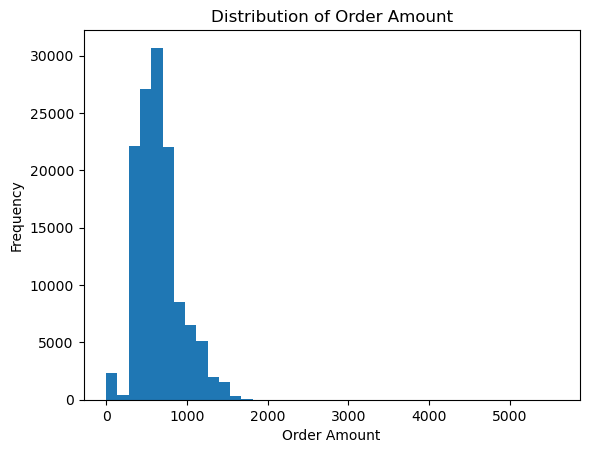

In [15]:
plt.figure()
df["amount"].plot(kind="hist", bins=40)
plt.title("Distribution of Order Amount")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()


## Visualisation 2: Total Sales by Product Category

**Purpose**  
This visualisation aims to identify which product categories contribute the most to overall sales revenue.

**Method**  
Order amounts were aggregated by `category` using a group-by operation and displayed using a bar chart for comparison.

**Interpretation**  
The results show that a small number of categories account for a large proportion of total sales, highlighting uneven category performance.


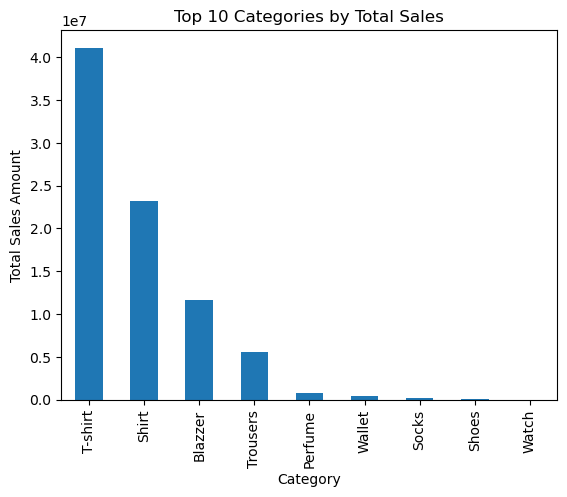

In [16]:
category_sales = (
    df.groupby("category")["amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
category_sales.plot(kind="bar")
plt.title("Top 10 Categories by Total Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales Amount")
plt.show()


## Visualisation 3: Monthly Sales Trend

**Purpose**  
The purpose of this visualisation is to analyse how sales performance changes over time and to identify possible seasonal patterns.

**Method**  
Sales amounts were aggregated by month using the order date and visualised using a line chart.

**Interpretation**  
Sales fluctuate across months, suggesting potential seasonality, promotional effects, or changing customer demand over time.


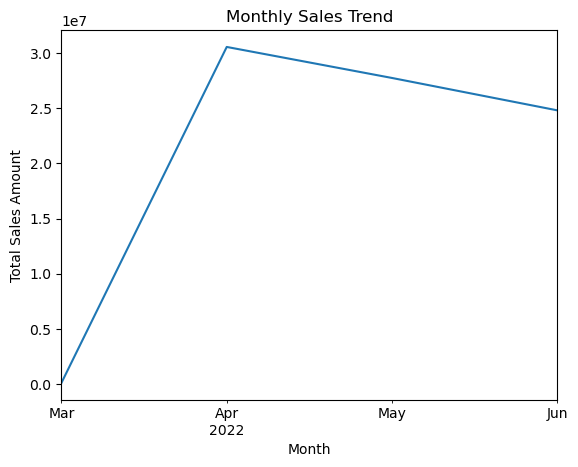

In [22]:
monthly_sales = (
    df.dropna(subset=["date"])
      .groupby(pd.Grouper(key="date", freq="ME"))["amount"]
      .sum()
)

plt.figure()
monthly_sales.plot(kind="line")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.show()


## Visualisation 4: Heatmap of Order Status and Fulfilment Method

**Purpose**  
This visualisation explores the relationship between order outcomes and fulfilment methods.

**Method**  
A cross-tabulation of `status` and `fulfilled_by` was created and visualised as a heatmap to show order counts across combinations.

**Interpretation**  
The heatmap highlights differences in operational outcomes across fulfilment methods, indicating where cancellations or successful deliveries are more frequent.


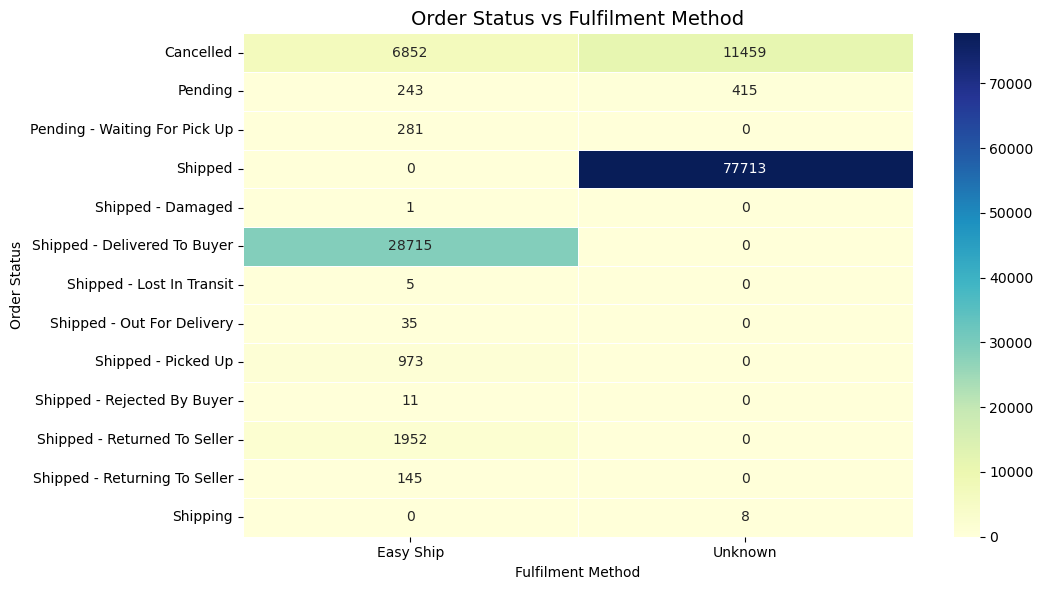

In [18]:
# Heatmap: Order Status vs Fulfilment Method (Improved styling)

status_fulfilment = pd.crosstab(df["status"], df["fulfilled_by"])

plt.figure(figsize=(11, 6))
sns.heatmap(
    status_fulfilment,
    annot=True,              # show values
    fmt="d",
    cmap="YlGnBu",           # lighter, professional colour palette
    linewidths=0.5,
    linecolor="white"
)

plt.title("Order Status vs Fulfilment Method", fontsize=14)
plt.xlabel("Fulfilment Method")
plt.ylabel("Order Status")
plt.tight_layout()
plt.show()


## Visualisation 5: Order Amount by Category (Boxplot)

**Purpose**  
The aim of this visualisation is to compare the spread, median, and presence of outliers in order amounts across product categories.

**Method**  
A boxplot was used to display the distribution of order amounts for the top-performing categories.

**Interpretation**  
Some categories show greater variability and higher outliers, suggesting differences in pricing structure and purchasing behaviour across categories.


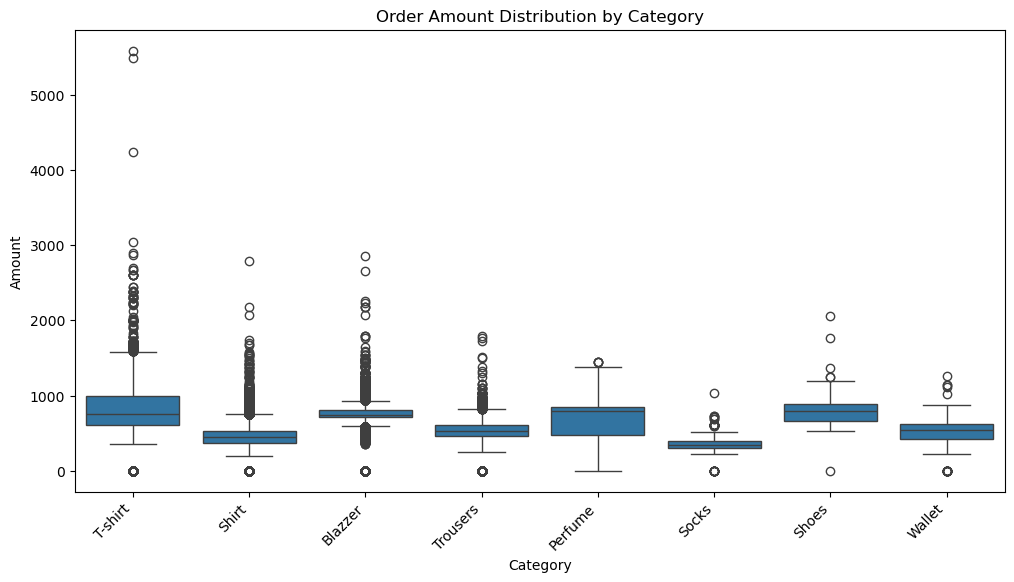

In [19]:
top_categories = (
    df.groupby("category")["amount"]
      .sum()
      .sort_values(ascending=False)
      .head(8)
      .index
)

df_box = df[df["category"].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x="category", y="amount")
plt.title("Order Amount Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.show()


# 6. Results (Visuals and Brief Discussion)

The visual analysis highlights several important patterns within the Amazon sales data:

- **Sales distribution** indicates a right-skewed pattern, with a high volume of small-to-medium value orders and a limited number of high-value transactions, which is characteristic of e-commerce activity.  
- **Revenue by category** shows that a small number of product categories contribute a disproportionately large share of total revenue, suggesting clear opportunities for inventory optimisation and targeted marketing.  
- **Order status distribution** provides insight into operational outcomes, highlighting the proportion of successfully delivered orders relative to cancelled or returned transactions.  
- **Monthly sales trends** display noticeable variation over time, potentially reflecting seasonality, promotional campaigns, or shifts in customer demand.  
- **Geographic concentration analysis** suggests that specific states or cities account for a higher share of revenue, indicating regionally concentrated demand and fulfilment activity.


# 7. Conclusion

This notebook demonstrates a reproducible Pandas-based workflow to clean and prepare transactional sales data.
After standardising types, handling missing values, validating consistency, and engineering features, the dataset becomes analysis-ready. Visual exploration reveals patterns by category, status, time, and geography. These insights can provide a basis for deeper analysis such as forecasting, profitability modelling (if cost data is available), customer segmentation, or operational optimisation.

# 8. Reference List (Harvard Style)

- McKinney, W. (2017) *Python for Data Analysis*. 2nd edn. Sebastopol: O’Reilly Media.

- Hunter, J.D. (2007) ‘Matplotlib: A 2D Graphics Environment’, *Computing in Science & Engineering*, 9(3), pp. 90–95.

- Dataset Provider (Year) *Amazon Sale Report Dataset*. Platform (e.g. Kaggle). Available at: (URL) (Accessed: DD Month YYYY).


## 9. Appendices

This section includes additional materials that support the main analysis but are not essential to the core discussion. These appendices are provided to improve transparency, reproducibility, and clarity of the data processing and exploration steps undertaken in this project.

### Appendix A: Dataset Overview and Column Description
The Amazon Sale Report dataset contains order-level transactional data, including variables related to order dates, product categories, quantities, sales amounts, fulfilment methods, order status, and shipping geography. These variables enable both operational and sales performance analysis.

### Appendix B: Data Cleaning and Processing Decisions
Several data processing decisions were made during the preparation of the dataset:
- Missing values in numerical fields such as sales amount were handled using median imputation to reduce the impact of extreme values.
- Missing categorical values (e.g., shipping city, shipping state, fulfilment method) were replaced with the label “Unknown” to retain observations for analysis.
- Duplicate records were identified and removed to prevent double counting.
- Data types were standardised to ensure consistency, particularly for date and numeric fields.
- Derived features such as month and year were created from the order date to support time-based analysis.

### Appendix C: Additional Visual Exploration
Additional charts and exploratory visuals were created during the analysis to validate patterns observed in the main results section. These include alternative category comparisons, geographic breakdowns, and operational heatmaps. While informative, these visuals were excluded from the main discussion to maintain focus and conciseness.

### Appendix D: Assumptions and Limitations
- The analysis assumes that the recorded sales amount accurately reflects revenue and does not account for costs, discounts, or refunds unless explicitly captured in the dataset.
- Geographic analysis is limited to the shipping information available and does not account for customer demographics.
- Time-based analysis is constrained by the date range covered in the dataset.

These limitations suggest opportunities for further data collection and more advanced analysis in future work.
